# Forecasting Project
## Name: Aditya Bhardwaj
## Unity ID: ABHARDW2

In [2]:
# Import files for the project are part of this section:

import pandas as pd
import numpy as np
import math
import os
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.api as sta
from statsmodels.tsa.ar_model import AR

In [5]:
# Setting the folder for the program
path = os.getcwd()
fileName = "BHARDWAJ ADITYA_1.csv"
dataset = pd.read_csv(fileName)
dataset = list(dataset['X'])
trainData, testData = dataset[:1500], dataset[1500:]

## Simple Moving Average (SMA)

12.5487726408


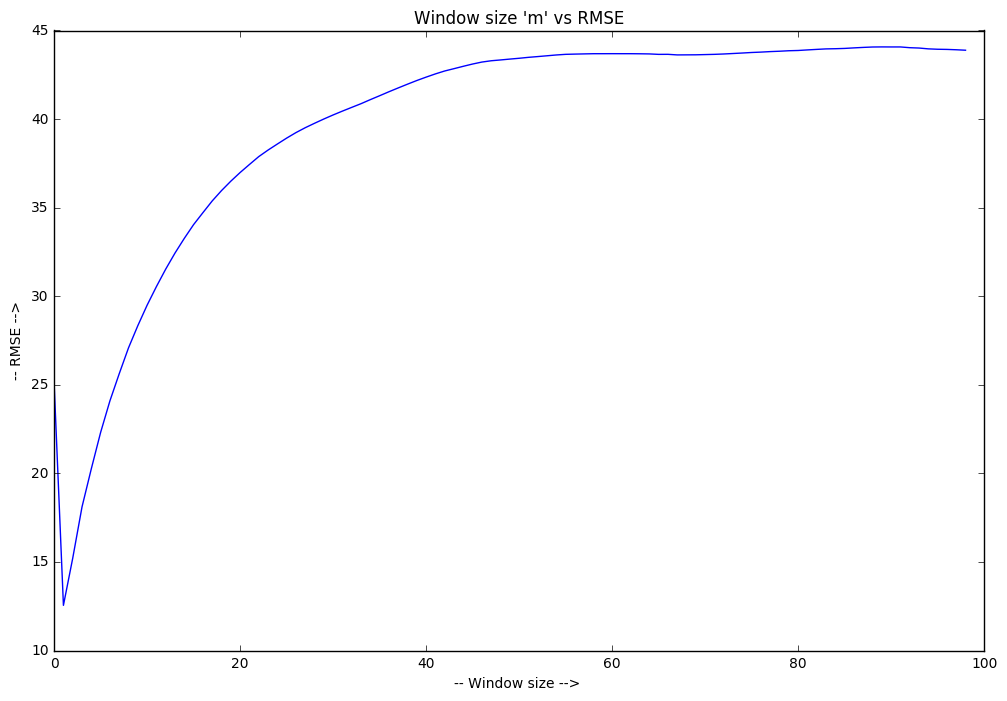

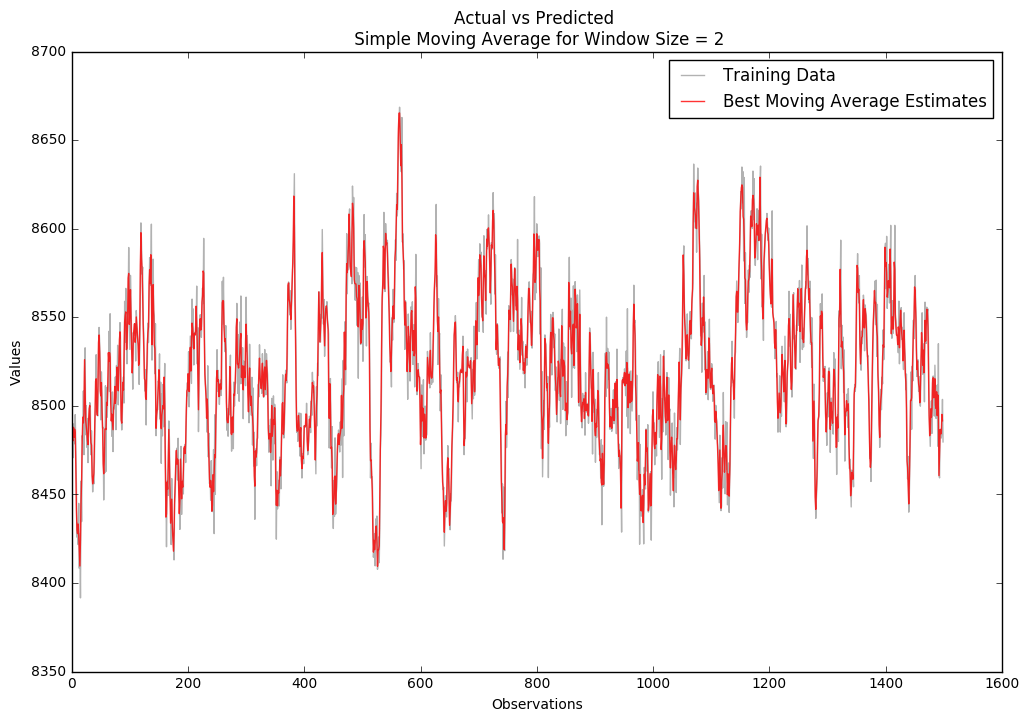

In [35]:
# Taken reference from the link below:
# https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
def sma(data, n):
    ret = np.cumsum(data, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


# Calculate Error and RMSE
def rmse_sma(data, window):
    weights = np.repeat(1.0, window)/window
    moving_avg = np.convolve(data, weights, 'valid')
    if window == 1:
        error = np.array(data[window:]) - np.array(moving_avg[:-1])
    else:
        error = np.array(data[window-1:]) - np.array(moving_avg)
    
    rmse = np.sqrt((error**2).mean())
    return rmse

def training_sma_rmse(trainData):
    # Vary value of 'm' and calculate again
    ma_rmse = []
    for m in range(1,100):
        rmse_temp = rmse_sma(trainData, m)
        ma_rmse.append(rmse_temp)

    print min(ma_rmse)
    
    # Plot RMSE vs 'm'
    fig = plt.figure(figsize=(12,8))
    plt.title("Window size 'm' vs RMSE")
    plt.xlabel("-- Window size --> ")
    plt.ylabel("-- RMSE -->")
    fig = plt.plot(ma_rmse)
    plt.show()
    plt.clf()

training_sma_rmse(trainData)
    
best_moving_avg = sma(trainData, 2)
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Actual vs Predicted \n Simple Moving Average for Window Size = " + str('2'))
plt.xlabel("Observations")
plt.ylabel("Values")
fig = plt.plot(trainData, c = 'gray', alpha = 0.6, label = "Training Data")
ax = plt.plot(best_moving_avg, c = 'red', alpha = 0.8, label = "Best Moving Average Estimates")
plt.legend()
plt.show()
plt.clf()

Conclusion:


## Exponential Smoothing

23.0440545333 0.62


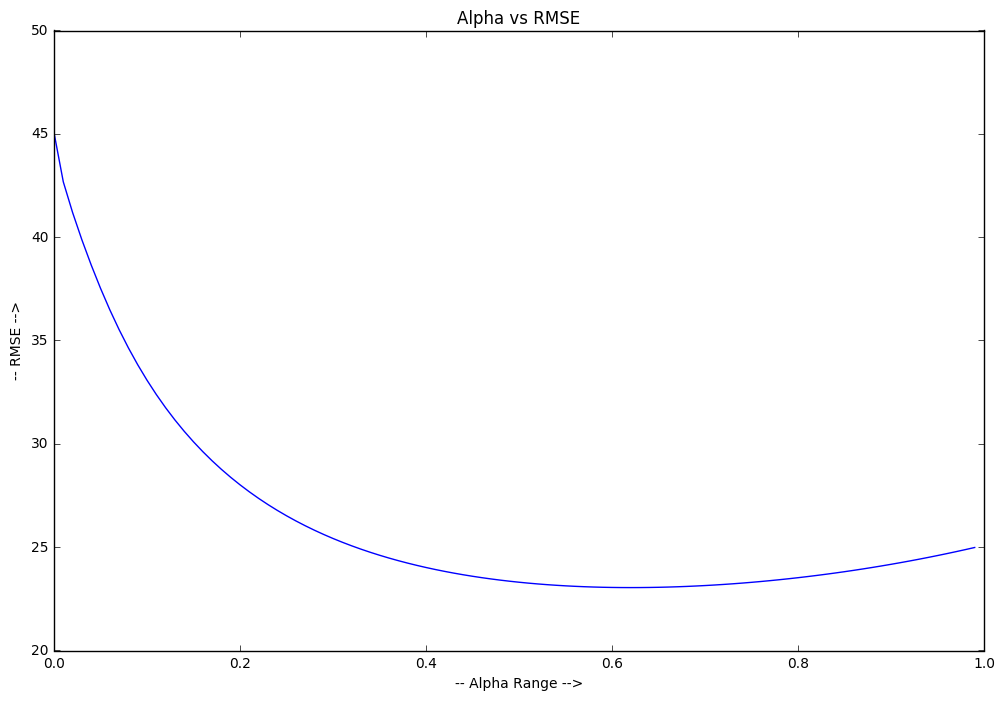

In [25]:
def ema(data, alpha):
    returnList = list()
    returnList.append(data[0])
    for i in range(1, len(data)):
        returnList.append(alpha*data[i-1] + (1-alpha) * returnList[i-1])
    return returnList

def rmse_ema(data, alpha):
    ema_value = ema(data, alpha)
    rmse = math.sqrt(skm.mean_squared_error(data, ema_value))
    return rmse

def training_ema_rmse(trainData):
    ema_rmse = list()
    step = 1/float(100)
    for alpha in np.arange(0, 1, step):
        rmse = rmse_ema(trainData, alpha)
        ema_rmse.append(rmse)

    print min(ema_rmse), ema_rmse.index(min(ema_rmse))/float(100)

    fig = plt.figure(figsize=(12,8))
    plt.title("Alpha vs RMSE")
    plt.xlabel("-- Alpha Range -->")
    plt.ylabel("-- RMSE -->")
    fig = plt.plot(np.arange(0,1,step), ema_rmse)
    #plt.savefig(plot_path + '/es_rmse_vs_alpha')
    plt.show()
    plt.clf()

training_ema_rmse(trainData)

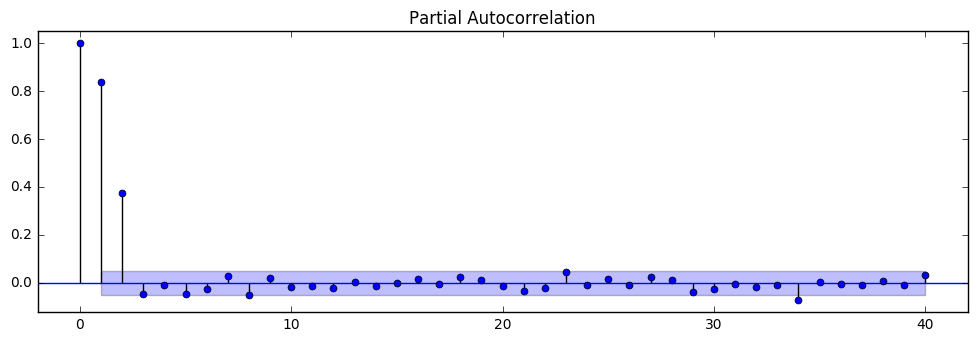

22.3036702779


In [26]:
# Task 3 - AutoRegression
def auto_reg(data, p):
    ar_model = AR(data)
    ar_predict = ar_model.fit(p).predict(p)
    rmse = math.sqrt(skm.mean_squared_error(data[p:], ar_predict))
    return rmse

ar_model = AR(trainData)
# Apply AR(p)
p = 1
first_ar_rmse = auto_reg(trainData, p)

# Select p by plotting the partial autocorelation function.
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sta.graphics.tsa.plot_pacf(trainData, lags = 40, ax=ax2)
#plt.savefig(plot_path + '/ar_pacf')
plt.show()
plt.clf()

p = 3
best_ar_rmse = auto_reg(trainData, p)

print best_ar_rmse

#temp_model = sta.tsa.ARMA(trainData, order=(p,0)).fit()
#print(temp_model.summary())




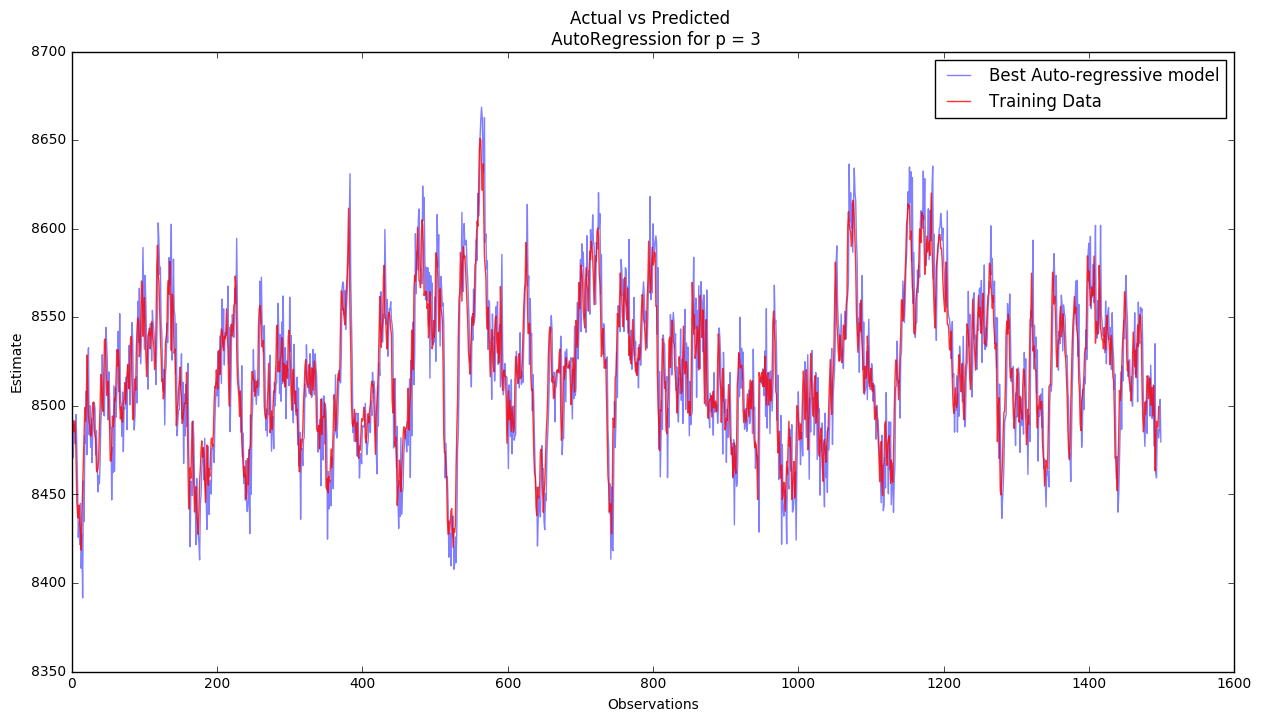

In [22]:
fig, ax = plt.subplots(figsize=(15,8))

ax = plt.plot(trainData, alpha = 0.5, c='blue', label = "Best Auto-regressive model")
fig = plt.plot(best_ar_predict, alpha = 0.8, c='red', label = "Training Data")
plt.title("Actual vs Predicted \n AutoRegression for p = " + str(p))
plt.xlabel("Observations")
plt.ylabel("Estimate")
plt.legend()
#plt.savefig(plot_path + '/act_vs_pred_AR')
plt.show()
plt.clf()